In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

c:\users\aliab\.conda\envs\training-segmentation\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\aliab\.conda\envs\training-segmentation\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\aliab\.conda\envs\training-segmentation\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\aliab\.conda\envs\trainin

In [2]:
import segmentation_models as sm
from segmentation_models import Unet
import xarray as xr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

from segmentation_models import Linknet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `tf.keras` framework.


'tf.keras'

In [3]:
label_files = glob(r'C:\Users\aliab\Downloads\train\*_labelIds.png')
image_files = glob(r'C:\Users\aliab\Downloads\aachen\*.png')
label_files.sort()
image_files.sort()

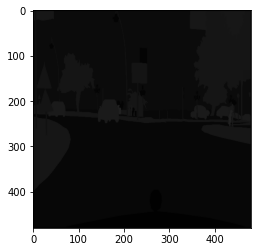

In [4]:
n = 100
size_config = 480, 480
images = [cv2.resize(cv2.imread(file), size_config) for file in image_files[:n]]
labels = [cv2.resize(cv2.imread(file), size_config) for file in label_files[:n]]
plt.imshow(labels[0])

In [5]:
X = np.asarray(images).astype(np.uint8)
y = np.asarray(labels).astype(np.uint8)
print(X.shape, y.shape)

(100, 480, 480, 3) (100, 480, 480, 3)


In [6]:
x_train = preprocess_input(X)
print(x_train.shape)

(100, 480, 480, 3)


In [7]:
model = Linknet('resnet34', input_shape=(*size_config, 3), encoder_weights=None, classes=3)
model.compile('Adam', loss='mean_absolute_error')

In [8]:
# fit model
history = model.fit(
    x=X,
    y=y,
    batch_size=1,
    epochs=100,
    verbose=1
)

Epoch 1/100


InternalError: cuDNN launch failure : input shape ([1,3,480,480])
	 [[Node: bn_data/cond/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, _class=["loc:@train...chNormGrad"], data_format="NCHW", epsilon=2e-05, is_training=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adam/gradients/bn_data/cond/FusedBatchNorm_grad/FusedBatchNormGrad-1-TransposeNHWCToNCHW-LayoutOptimizer, bn_data/cond/FusedBatchNorm_1/Switch_1:1, bn_data/cond/ReadVariableOp, decoder_stage4c_bn/cond/Const, decoder_stage4c_bn/cond/Const)]]
	 [[Node: loss/mul/_1465 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_15892_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]